<a href="https://colab.research.google.com/github/sanjana251/ML-ACTIVITY/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

In [4]:
linreg = LinearRegression()
linreg.fit(temperature, preasure) #fit the model

LinearRegression()

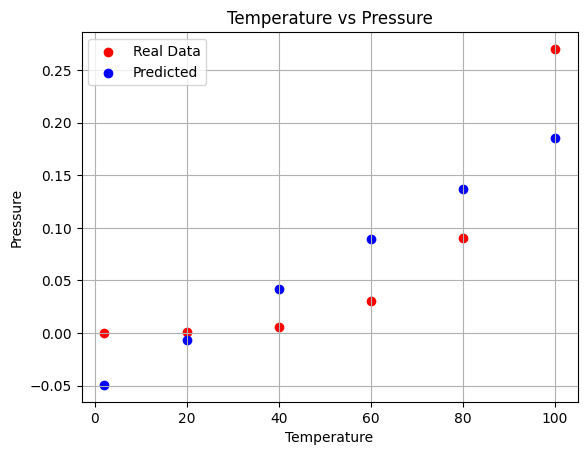

In [5]:
#predict the output
predicted = linreg.predict(temperature)
#plot the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted, color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

In [6]:
# Display the coefficients and intercept
print(f"Coefficient (slope): {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_}")

Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481


In [7]:
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(preasure, predicted)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.047339461048505636


In [8]:

#predict the output for new given data ie given temperature is 30

given_temperature = np.array([[30]])
predicted_pressure = linreg.predict(given_temperature)
print(f"Predicted pressure for the given temperature {given_temperature[0][0]}: {predicted_pressure[0]}")

Predicted pressure for the given temperature 30: 0.017630788829005414


In [9]:
# Using the coefficients and intercept to predict the pressure for a temperature of 30

predicted_pressure_compute =  linreg.coef_[0] * given_temperature+ linreg.intercept_
print(f"predicted pressure computed using coefficient and intercept: {predicted_pressure_compute}")

predicted pressure computed using coefficient and intercept: [[0.01763079]]


In [10]:
# Display the learned linear regression equation
print("Linear Regression Equation:")
print(f"Pressure = {linreg.coef_[0]:.6f} * Temperature + {linreg.intercept_:.6f}")


Linear Regression Equation:
Pressure = 0.002390 * Temperature + -0.054078


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load Boston housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Ensure all data is numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (if any)
df = df.dropna()

# Split features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Double-check types
assert np.issubdtype(X.dtypes[0], np.number), "X contains non-numeric values"

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Output coefficients
print("\n--- Model Coefficients ---")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")



--- Model Coefficients ---
CRIM: -0.1131
ZN: 0.0301
INDUS: 0.0404
CHAS: 2.7844
NOX: -17.2026
RM: 4.4388
AGE: -0.0063
DIS: -1.4479
RAD: 0.2624
TAX: -0.0106
PTRATIO: -0.9155
B: 0.0124
LSTAT: -0.5086

Intercept: 30.2468

Mean Absolute Error: 3.1891
R² Score: 0.6688


<ipython-input-11-0410e2fb9315>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert np.issubdtype(X.dtypes[0], np.number), "X contains non-numeric values"


Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481
Manually computed pressure for temperature 40: 0.04153367956883881
Model prediction for temperature 40: 0.04153367956883881


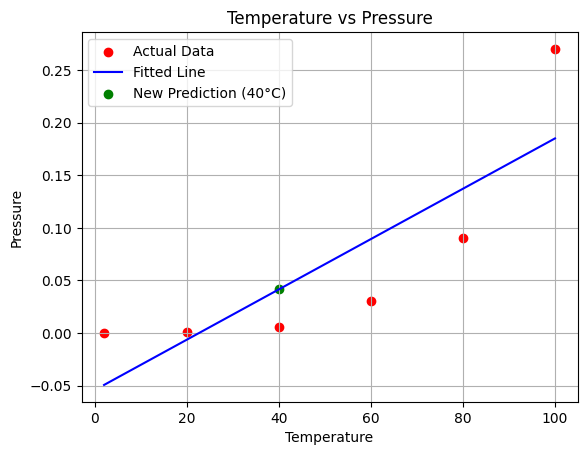

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load your dataset
df = pd.read_csv('testdata.csv')

# Extract features and target
temperature = df.iloc[:, 1:2].values  # Input (2nd column)
pressure = df.iloc[:, 2].values       # Output (3rd column)

# Train linear regression model
linreg = LinearRegression()
linreg.fit(temperature, pressure)

# Display the coefficient and intercept
coefficient = linreg.coef_[0]
intercept = linreg.intercept_
print(f"Coefficient (slope): {coefficient}")
print(f"Intercept: {intercept}")

# Predict manually for temperature = 40
new_temperature = 40
manual_prediction = coefficient * new_temperature + intercept
print(f"Manually computed pressure for temperature {new_temperature}: {manual_prediction}")

# Predict using the model
model_prediction = linreg.predict(np.array([[new_temperature]]))[0]
print(f"Model prediction for temperature {new_temperature}: {model_prediction}")

# Verify that both are the same (or very close)
assert np.isclose(manual_prediction, model_prediction), "Mismatch in manual and model prediction"

# Plot
plt.scatter(temperature, pressure, color='red', label='Actual Data')
plt.plot(temperature, linreg.predict(temperature), color='blue', label='Fitted Line')
plt.scatter(new_temperature, model_prediction, color='green', label='New Prediction (40°C)')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.grid()
plt.show()


Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481

Evaluation Metrics:
Mean Absolute Error (MAE): 0.0473
Mean Squared Error (MSE): 0.0028
Root Mean Squared Error (RMSE): 0.0528
Relative MSE (RelMSE): 0.2044
Coefficient of Variation (CV): 0.7976


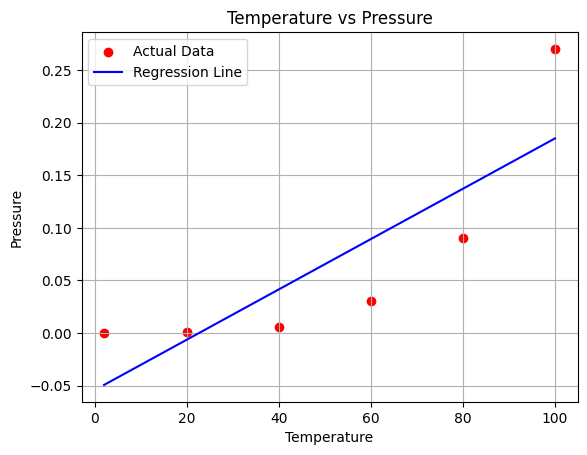

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('testdata.csv')

# Extract input and output
temperature = df.iloc[:, 1:2].values  # Input (2nd column)
pressure = df.iloc[:, 2].values       # Output (3rd column)

# Train linear regression model
model = LinearRegression()
model.fit(temperature, pressure)

# Predict values
predicted_pressure = model.predict(temperature)

# Coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Evaluation Metrics
mae = mean_absolute_error(pressure, predicted_pressure)
mse = mean_squared_error(pressure, predicted_pressure)
rmse = np.sqrt(mse)
rel_mse = mse / np.mean(pressure**2)
cv = rmse / np.mean(pressure)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Relative MSE (RelMSE): {rel_mse:.4f}")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# Plotting
plt.scatter(temperature, pressure, color='red', label='Actual Data')
plt.plot(temperature, predicted_pressure, color='blue', label='Regression Line')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.grid()
plt.show()
